In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.impute import SimpleImputer


# Load original dataset
original_df = pd.read_csv('../data/original/AmesHousing.csv')

# Load competition datasets
train_df = pd.read_csv('../data/competition/train.csv')
test_df = pd.read_csv('../data/competition/test.csv')

2024-07-04 01:20:33.970538: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 01:20:34.880780: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 01:20:35.227323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 01:20:35.791792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 01:20:35.795252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 01:20:36.801263: I tensorflow/core/platform/cpu_feature_guard.cc:

## Data Overview and Initial Analysis:

In [42]:
# Display the first few rows of each dataset
print("Original Dataset")
display(original_df.head())

print("Competition Train Dataset")
display(train_df.head())

print("Competition Test Dataset")
display(test_df.head())


Original Dataset


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Competition Train Dataset


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Competition Test Dataset


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
# Check columns in each dataset
print("Original Dataset Columns")
print(original_df.columns)
print("")

print("Competition Train Dataset Columns")
print(train_df.columns)
print("")

print("Competition Test Dataset Columns")
print(test_df.columns)
print("")


Original Dataset Columns
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type'

### Feature Engineering:

In [44]:
# Example: Handling categorical features in competition dataset
categorical_cols = train_df.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

# Align train and test datasets
train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df.fillna(0, inplace=True)


### Model Training and Evaluation:

- Handle missing values using an imputer.
- Split the dataset into training and validation sets.
- Train the model.
- Evaluate the model.

Load the dataset into train_df.

Use SimpleImputer from sklearn.impute to fill missing values with the mean of the column.

Use train_test_split to split the data into training and validation sets.

Train a LinearRegression model using the training data.

Predict on the validation set and calculate the RMSE to evaluate the model's performance.

In [45]:

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = train_df.drop('SalePrice', axis=1)
X = imputer.fit_transform(X)
y = train_df['SalePrice']

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_valid)
mse = mean_squared_error(y_valid, predictions)
rmse = np.sqrt(mse)  # Calculate RMSE manually to avoid warning
mae = mean_absolute_error(y_valid, predictions)
mape = mean_absolute_percentage_error(y_valid, predictions) * 100  # MAPE as percentage

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


MSE: 4272688421.5364256
RMSE: 65365.80468055469
MAE: 21166.10516747552
MAPE: 12.918629204010855%


            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

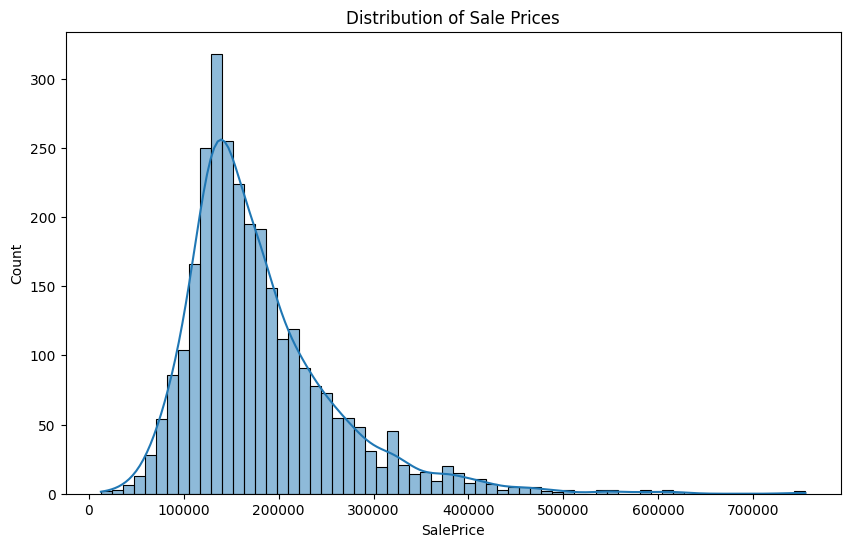

Missing values in each column:
 Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64


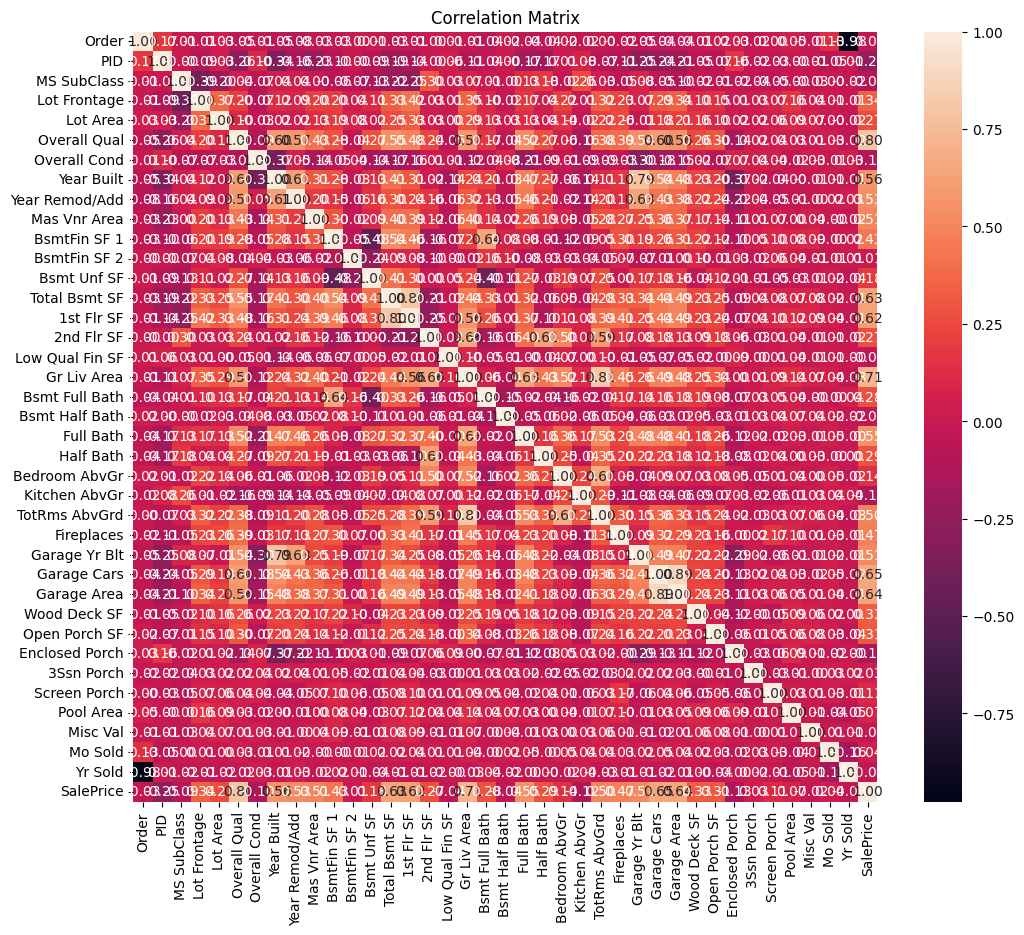

In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Summary statistics
print(original_df.describe())

# Distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(original_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Select only numerical columns for correlation matrix
numerical_df = original_df.select_dtypes(include=['float64', 'int64'])

# Check for missing values
missing_values = numerical_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill or drop missing values as needed
numerical_df = numerical_df.fillna(numerical_df.mean())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

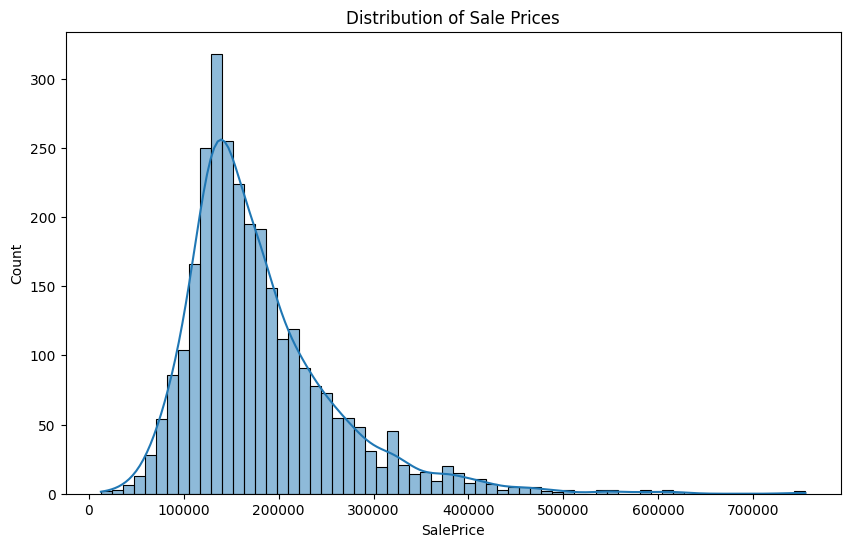

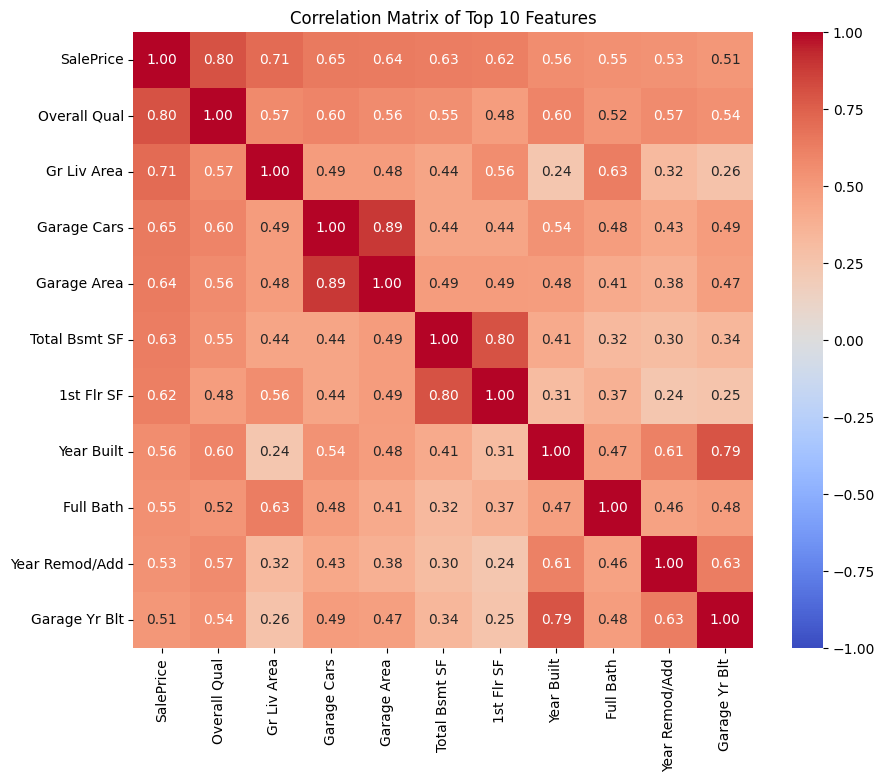

In [47]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Summary statistics
print(original_df.describe())

# Distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(original_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Select only numerical columns for correlation matrix
numerical_df = original_df.select_dtypes(include=['float64', 'int64'])

# Fill missing values with the mean of each column
numerical_df = numerical_df.fillna(numerical_df.mean())

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Get the top 10 features that have the highest correlation with 'SalePrice'
top_10_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index

# Create a correlation matrix with the top 10 features
top_10_corr = correlation_matrix.loc[top_10_features, top_10_features]

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top 10 Features')
plt.show()
